In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel("heart.xlsx")

In [3]:
df

,sex,cp,fbs,restecg,exang,target
0,1,1,1,0,0,1
1,1,1,0,1,0,1
2,0,1,0,0,0,1
3,1,1,0,1,0,1
4,0,0,0,1,1,1
...,...,...,...,...,...,...
298,0,0,0,1,1,0
299,1,1,0,1,0,0
300,1,0,1,1,0,0
301,1,0,0,1,1,0


In [4]:
df.dtypes

sex        int64
cp         int64
fbs        int64
restecg    int64
exang      int64
target     int64
dtype: object

In [5]:
df.columns

Index(['sex', 'cp', 'fbs', 'restecg', 'exang', 'target'], dtype='object')

In [6]:
df.isnull().sum()

sex        0
cp         0
fbs        0
restecg    0
exang      0
target     0
dtype: int64

In [7]:
x=df[['sex','cp','fbs','restecg','exang']]

In [8]:
x

,sex,cp,fbs,restecg,exang
0,1,1,1,0,0
1,1,1,0,1,0
2,0,1,0,0,0
3,1,1,0,1,0
4,0,0,0,1,1
...,...,...,...,...,...
298,0,0,0,1,1
299,1,1,0,1,0
300,1,0,1,1,0
301,1,0,0,1,1


In [9]:
y=df['target']

In [10]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
model=LogisticRegression()

In [15]:
model.fit(x_train,y_train)

LogisticRegression()

In [16]:
y_predL=model.predict(x_test)

In [17]:
y_predL

array([1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1], dtype=int64)

In [18]:
model.score(x_train,y_train)

0.7735849056603774

In [19]:
model.score(x_test,y_test)

0.7692307692307693

In [20]:
df_new1 = pd.DataFrame({'Actual':y_test,'Predicted':y_predL})

In [21]:
df_new1

,Actual,Predicted
36,1,1
189,0,0
112,1,1
207,0,1
297,0,0
...,...,...
83,1,1
259,0,0
186,0,0
63,1,1


In [22]:
from sklearn.metrics import accuracy_score

In [24]:
accuracyL =accuracy_score(y_test,y_predL)*100

In [25]:
accuracyL

76.92307692307693

### DecisionTreeClassifier

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
model=DecisionTreeClassifier()

In [28]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [29]:
y_predict = model.predict(x_test)

In [30]:
y_predict

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1], dtype=int64)

In [31]:
df_nw=pd.DataFrame({'Actual':y_test,'Predicted':y_predict})

In [32]:
df_nw

,Actual,Predicted
36,1,0
189,0,0
112,1,1
207,0,1
297,0,0
...,...,...
83,1,1
259,0,1
186,0,0
63,1,1


In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy=accuracy_score(y_test,y_predict)*100

In [35]:
accuracy

68.13186813186813

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
performance=confusion_matrix(y_test,y_predict)

In [38]:
performance

array([[22, 15],
       [14, 40]], dtype=int64)

In [39]:
from sklearn.metrics import plot_confusion_matrix

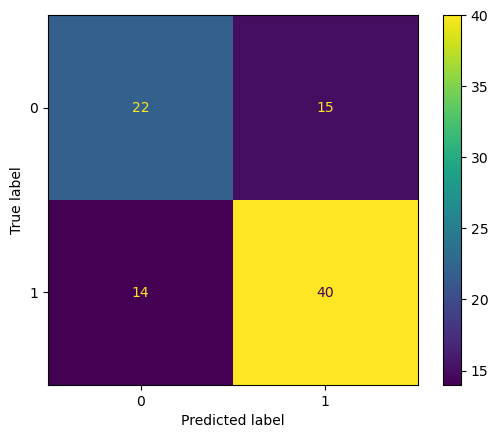

In [40]:
plot_confusion_matrix(model,x_test,y_test)
plt.show()

In [41]:
from sklearn.metrics import classification_report

In [42]:
report=classification_report(y_test,y_predict)

In [43]:
print(report)

              precision    recall  f1-score   support

           0       0.61      0.59      0.60        37
           1       0.73      0.74      0.73        54

    accuracy                           0.68        91
   macro avg       0.67      0.67      0.67        91
weighted avg       0.68      0.68      0.68        91



In [44]:
y.value_counts()

1    165
0    138
Name: target, dtype: int64

In [45]:
df.columns

Index(['sex', 'cp', 'fbs', 'restecg', 'exang', 'target'], dtype='object')

In [46]:
from sklearn import tree

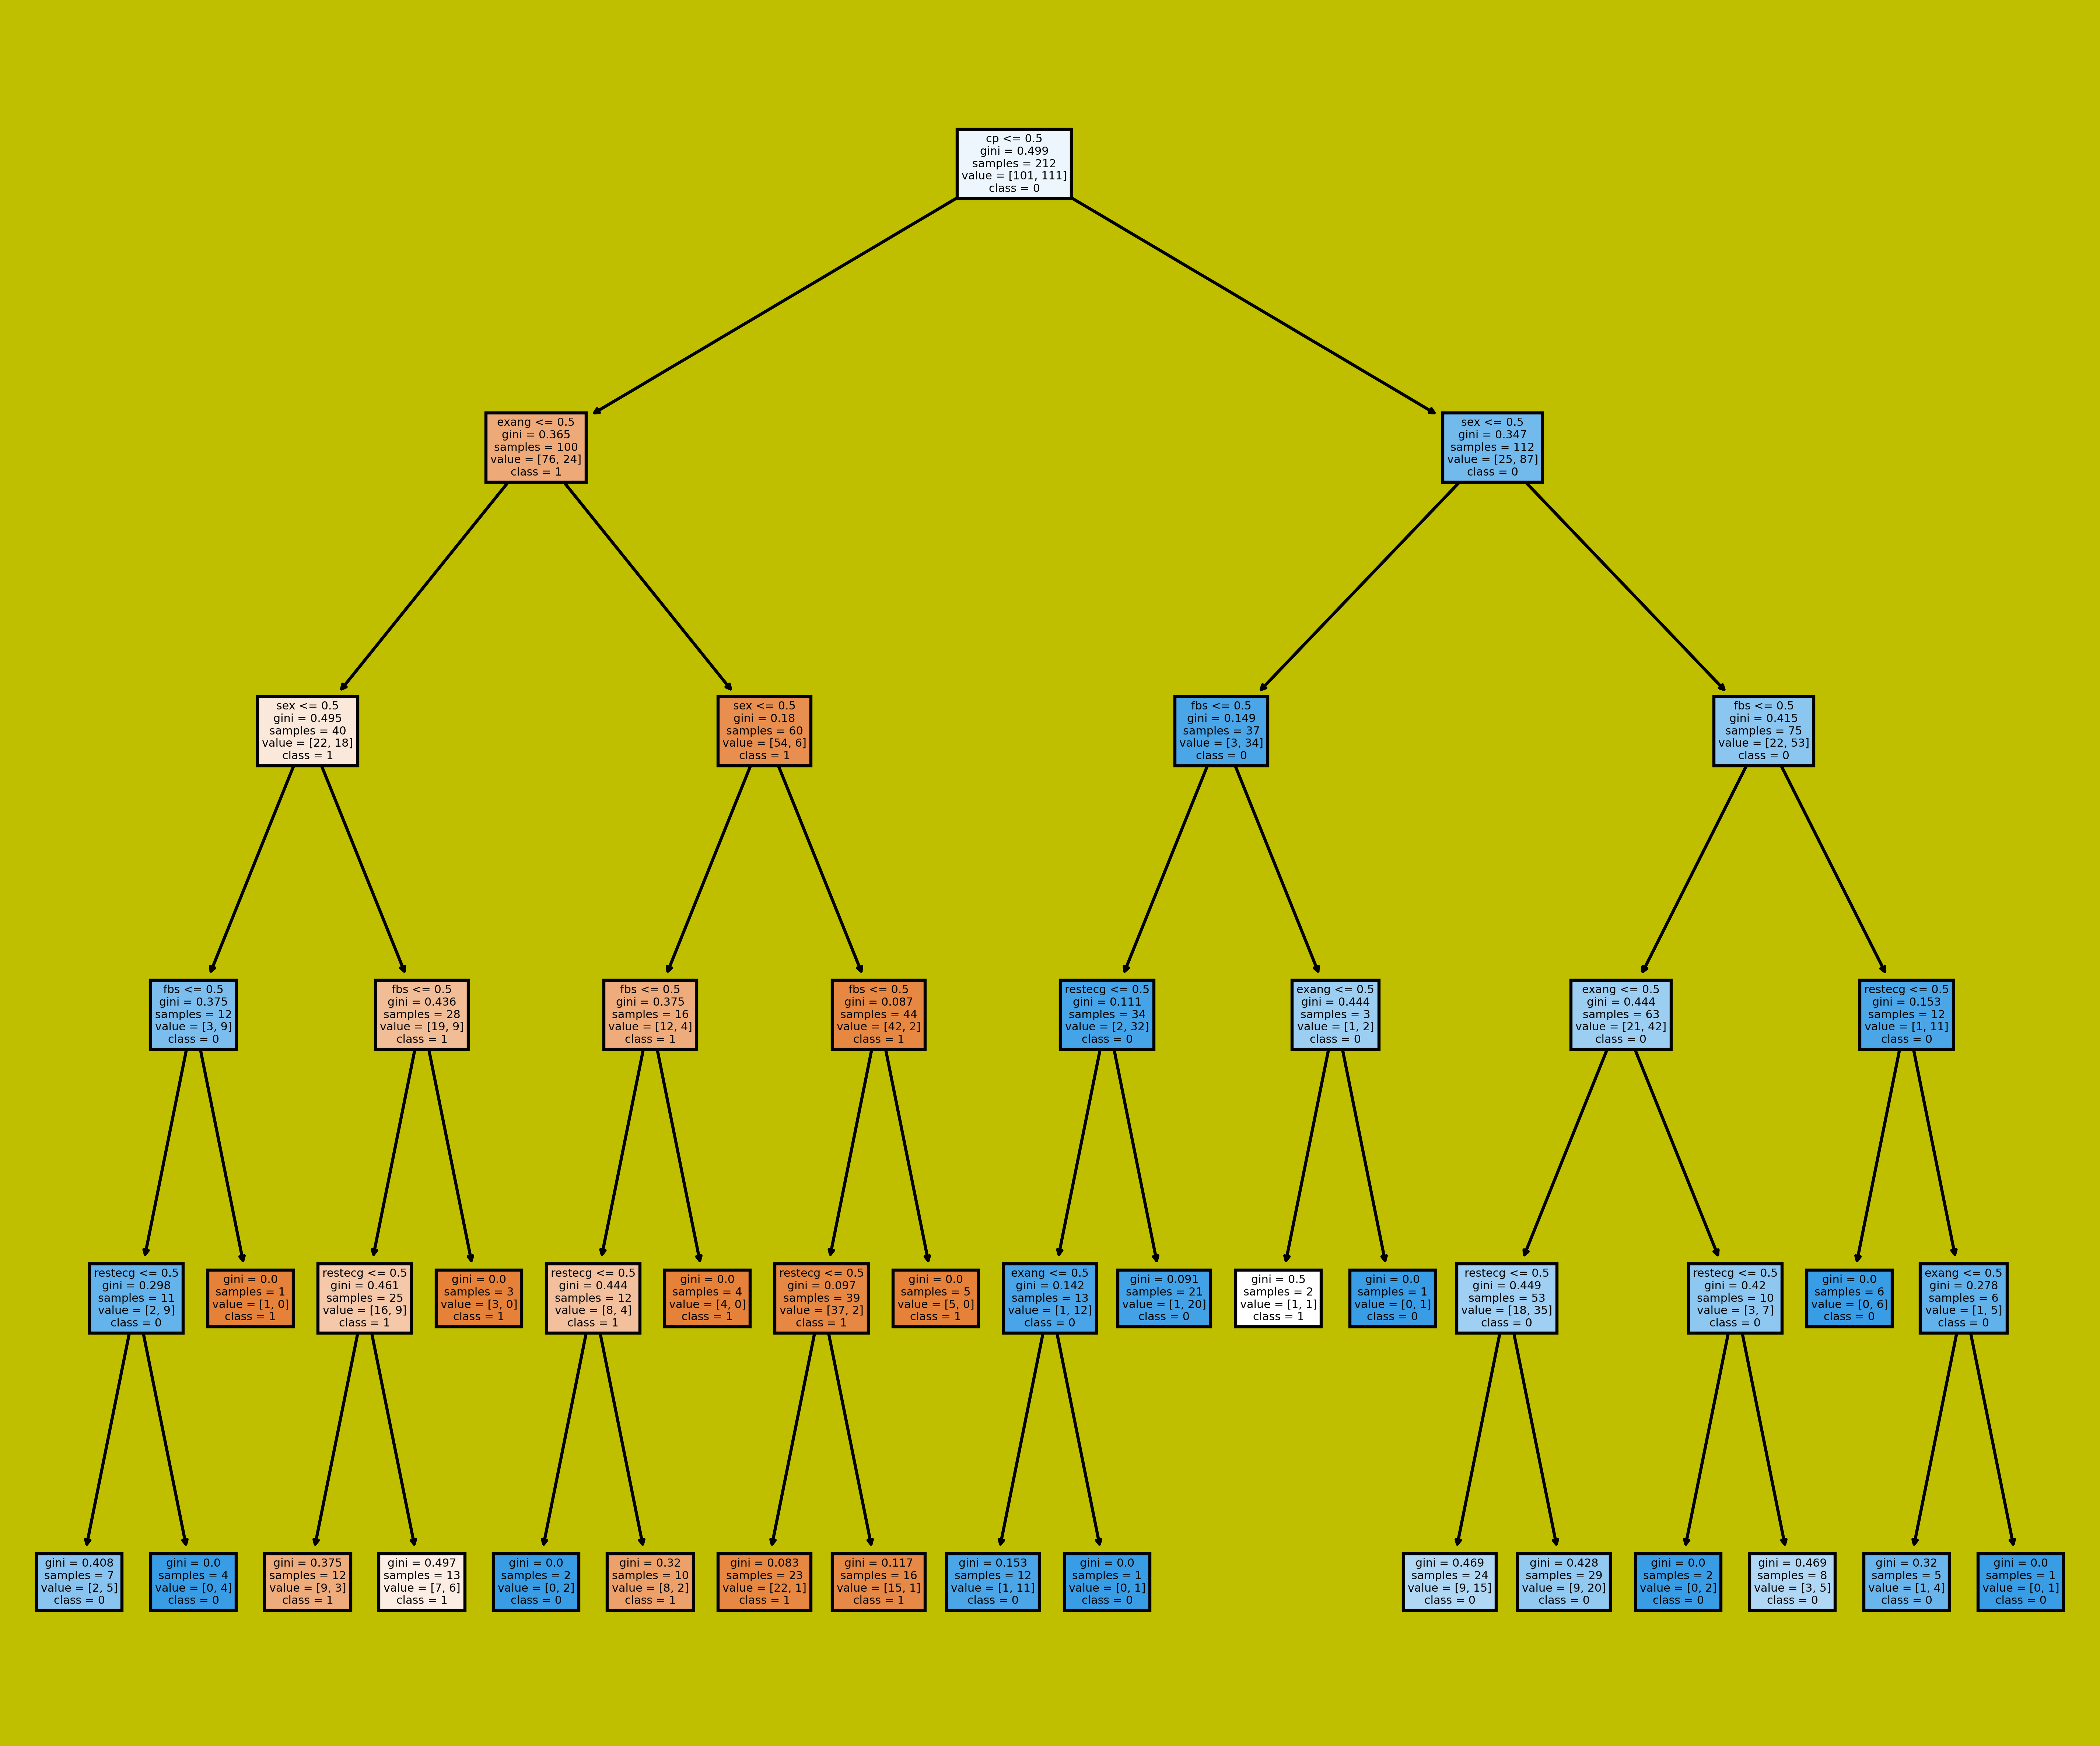

In [53]:
f=['sex', 'cp', 'fbs', 'restecg', 'exang']
c=['1','0']
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(12,10),dpi=600,facecolor='y') #dpi= better resolution
tree.plot_tree(model,feature_names=f,class_names=c,filled=True)
fig.savefig('decision.png')
plt.show()

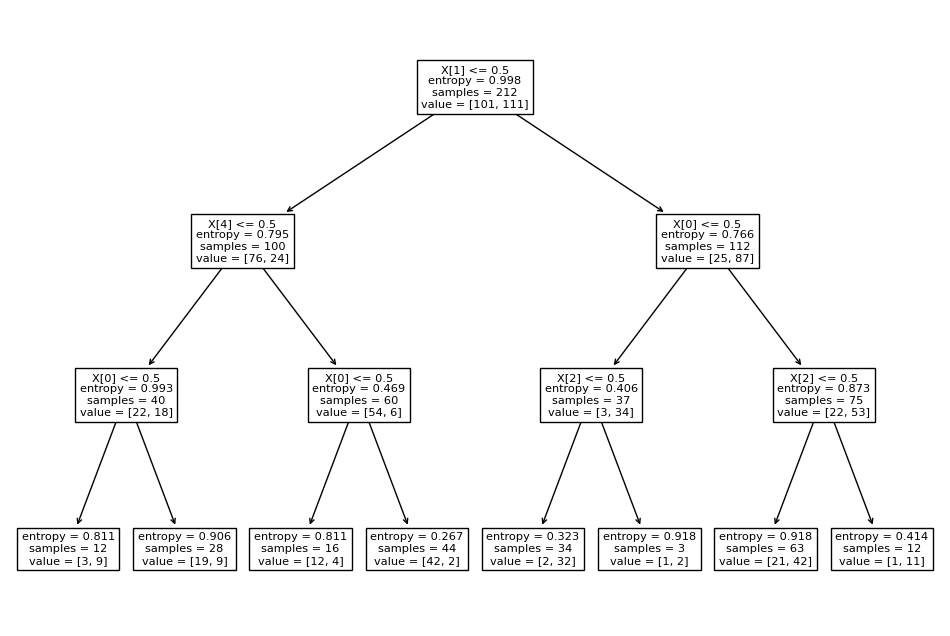

In [52]:
en= DecisionTreeClassifier(criterion='entropy',max_depth=3)
en.fit(x_train, y_train)
plt.figure(figsize=(12,8))
tree.plot_tree(en.fit(x_train, y_train)) 
plt.show()